In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("data/Customers.csv")
products = pd.read_csv("data/Products.csv")
transactions = pd.read_csv("data/Transactions.csv")

In [31]:
### Display basic info

customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [28]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [29]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [46]:
print("Customers:")
print(customers.info(), "\n")
print(customers.describe(include='all'))

Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None 

       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           N

In [47]:
print("Products:")
print(products.info(), "\n")
print(products.describe(include='all'))

Products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN           

In [49]:
print("Transactions:")
print(transactions.info(), "\n")
print(transactions.describe(include='all'))

Transactions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None 

       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00992      C0109      P059                            NaN   
freq       

In [42]:
### Check for missing values

print("Missing Values:\n")
print(customers.isnull().sum(), "\n")
print(products.isnull().sum(), "\n")
print(transactions.isnull().sum(), "\n")

Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [38]:
### Check for unique values

print("Customer Unique Values:\n")
print(customers.nunique(), "\n")
print("Products Unique Values:\n")
print(products.nunique(), "\n")
print("Transactions Unique Values:\n")
print(transactions.nunique(), "\n")

Customer Unique Values:

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64 

Products Unique Values:

ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64 

Transactions Unique Values:

TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64 



In [50]:
## Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [90]:
# Merge transactions with customers and products
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID", suffixes=('', '_remove'))
# data = data.T.drop_duplicates().T
data.drop(data.filter(regex='_remove$').columns, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [91]:
# EDA Visualizations
sns.set_style("whitegrid")

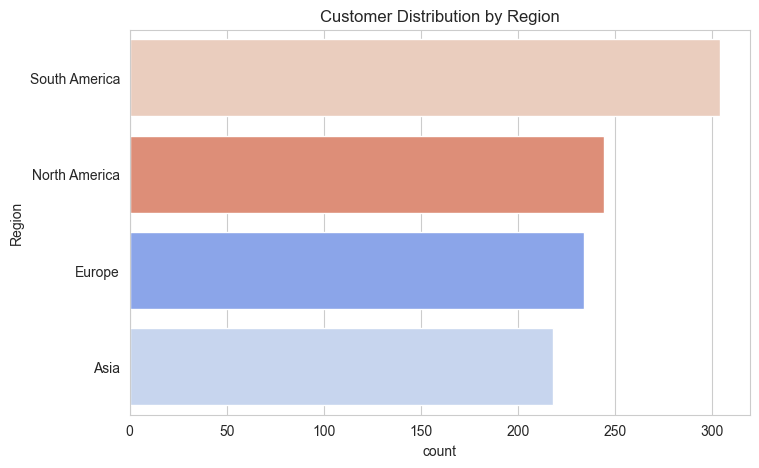

In [103]:
# 1. Customer Distribution by Region
plt.figure(figsize=(8,5))
sns.countplot(y=data["Region"], order=data["Region"].value_counts().index, palette="coolwarm", hue=data["Region"], legend=False)
plt.title("Customer Distribution by Region")
plt.show()

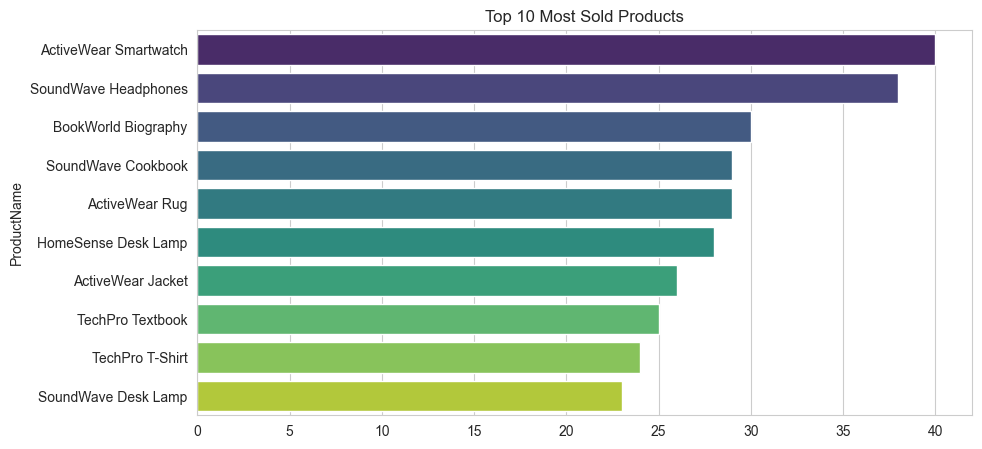

In [102]:
# 2. Top 10 Most Sold Products
plt.figure(figsize=(10,5))
top_products = data["ProductName"].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", legend=False)
plt.title("Top 10 Most Sold Products")
plt.show()

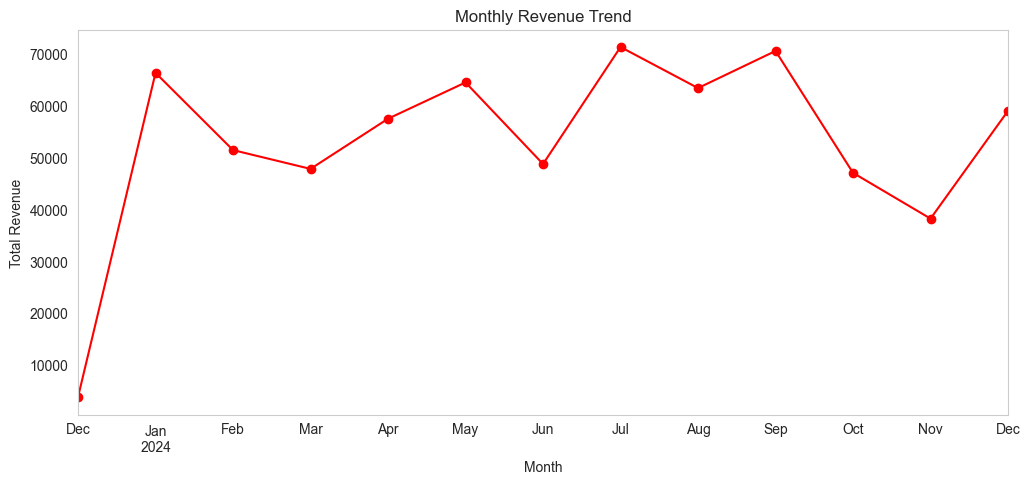

In [105]:
# 3. Monthly Transactions Trend
data["Month"] = data["TransactionDate"].dt.to_period("M")
monthly_sales = data.groupby("Month")["TotalValue"].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(marker="o", color="r")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

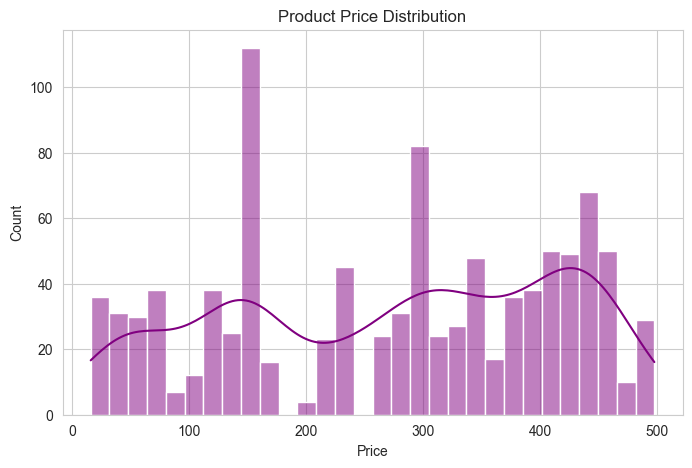

In [106]:
# 4. Price Distribution of Products
plt.figure(figsize=(8,5))
sns.histplot(data["Price"], bins=30, kde=True, color="purple")
plt.title("Product Price Distribution")
plt.show()

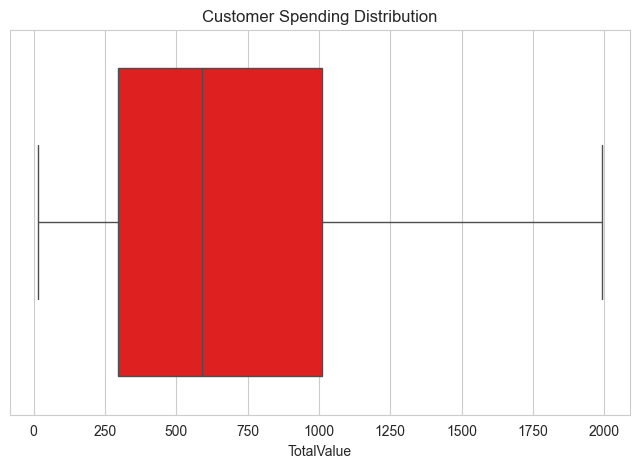

In [108]:
# 5. Customer Spending Distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=data["TotalValue"], color="red")
plt.title("Customer Spending Distribution")
plt.show()